In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
import numpy as np
import matplotlib.pyplot as plt

import os
os.chdir('/home/raid/Desktop/Shubh/DLProject/experiments')

from helpers.trainer import Trainer
from helpers.train_all import TrainerAll

In [2]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)

cuda


In [3]:
# Defining batch size as given on page 7 on Adam Research Paper
batch_size = 64  

# Calculate the number of workers to use for DataLoader
num_workers = 8

# transformations
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.1307,), (0.3081,))])

In [4]:
os.chdir('/home/raid/Desktop/Shubh/DLProject/experiments/models')

# MNIST dataset
train_dataset = datasets.MNIST(root='../../datasets/',
                               train=True,
                               transform=transform,
                               download=True)

test_dataset = datasets.MNIST(root='../../datasets/',
                                train=False,
                                transform=transform)

# Data loader
train_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                                           batch_size=batch_size,
                                           shuffle=True,
                                           num_workers=num_workers)

test_loader = torch.utils.data.DataLoader(dataset=test_dataset,
                                            batch_size=batch_size,
                                            shuffle=False,
                                            num_workers=num_workers)

In [5]:
# defining the model
class NN(nn.Module):
    def __init__(self):
        super(NN, self).__init__()
        self.fc1 = nn.Linear(784, 512)
        self.fc2 = nn.Linear(512, 256)
        self.fc3 = nn.Linear(256, 64)
        self.fc4 = nn.Linear(64, 10)

    def forward(self, x):
        x = x.view(-1, 784)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = self.fc4(x)
        x = F.softmax(x, dim=1)
        
        return x

In [6]:
criterion = nn.CrossEntropyLoss()
epochs = 100

optimizer = optim.Adam

In [15]:
model = NN().to(device)
trainer = Trainer(model, criterion, optimizer)

head1, head2, head3 = 'EPOCHS', 'TRAIN LOSS', 'VAL LOSS'
print(f'{head1 :>6} {head2 :>25} {head3 :>25}')

trainer.train(train_loader, test_loader, epochs)

EPOCHS                TRAIN LOSS                  VAL LOSS


    10        1.4974733504659332        1.5027846006830787
    20        1.4989467818599773        1.5093316788886004
    30        1.5014104285219838        1.5097374012515803
    40        1.5068813526808327        1.5027115519639034
    50        1.5079167233601307        1.5373056785316224
    60        1.5065864047516129         1.527777211681293
    70         1.516838098385695        1.5052712085140738
    80        1.5153220361992241        1.5220694754533708
    90        1.5085249545731778        1.5129431182411825
   100        1.5308377303040104         1.533777342480459


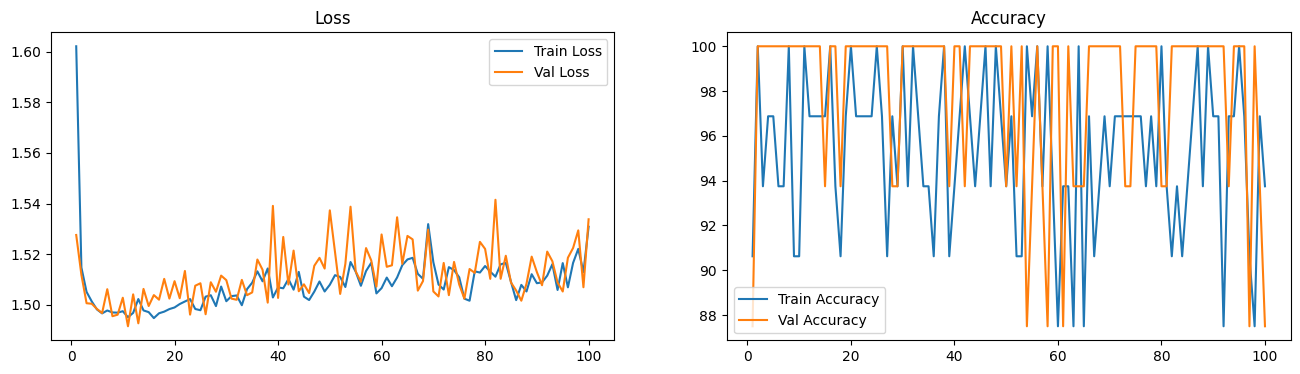

In [16]:
trainer.plot_graph()

In [10]:
model = NN().to(device)
trainer = TrainerAll(train_loader, test_loader, criterion, epochs=50)

head1, head2, head3 = 'EPOCHS', 'TRAIN LOSS', 'VAL LOSS'
print(f'{head1 :>6} {head2 :>25} {head3 :>25}')

log = trainer.train_all_optim(model)

EPOCHS                TRAIN LOSS                  VAL LOSS
Optimizer : Adam_torch


    10         1.498317223240826        1.5049002132598002
    20         1.499802925693455        1.5095449822723486
    30        1.5103085418499864         1.504098429042063
    40         1.513910119848719        1.5098087407980756
    50        1.5097513308148902        1.5246426246728106
Optimizer : Adam_custom
    10        1.4941097396269027        1.5014209891580472
    20         1.494743559533345        1.4996868341591707
    30         1.494319171412413        1.5057893619415865
    40        1.4963587287392444         1.495785196875311
    50        1.4988589420247433        1.4976756929591963


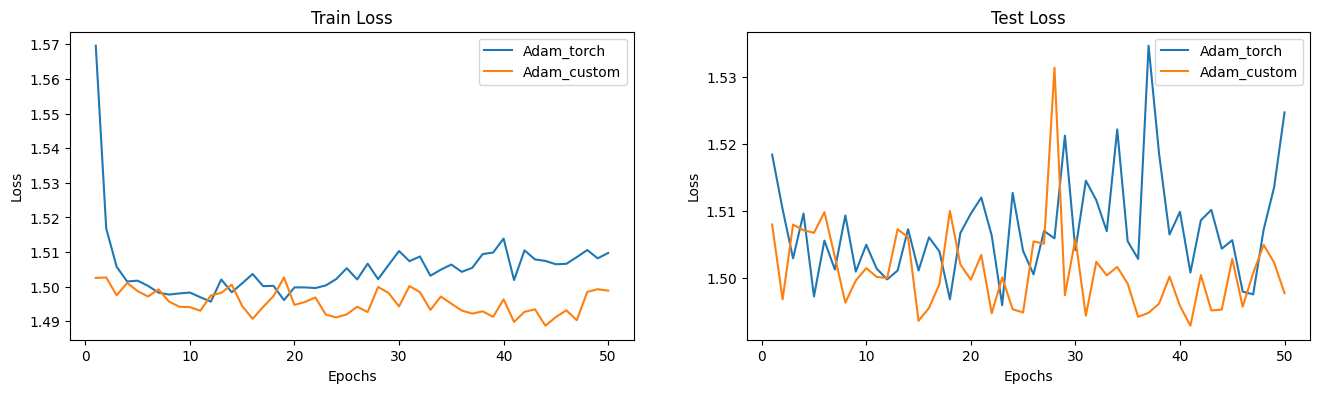

In [11]:
trainer.plot_loss_graphs()

In [13]:
import json

with open('../results/logs/MNIST_DNN.json', 'w', encoding ='utf8') as file: 
    json.dump(log, file, ensure_ascii = False, indent=4) 